## Distant reading study week 4 (VT-23)

### Learning material 4a: Topic modeling with Mallet

Matti La Mela

This Notebook introduces us to topic modeling with Mallet, and how to explore the results with Python.

The Notebook has two parts. The first is optional, thus it guides you how to install Mallet on your computer and how to build topic models. It is a very useful exercise, so read it through. In Part 2, you can use the topic modeling output files included in this learning material.

### The reference readings for this learning material is

o Shawn Graham, Scott Weingart & Ian Milligan, "Getting Started with Topic Modeling and MALLET," The Programming Historian, 2012, URL: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet

o Ian Milligan & James Baker, "Introduction to the Bash Command Line," The Programming Historian, 2014, URL: https://programminghistorian.org/en/lessons/intro-to-bash


---

### 1. Using Mallet for topic modeling

In this section of the learning material, you should install Mallet on your computer. In general, please follow the instructions in:

**Shawn Graham, Scott Weingart, and Ian Milligan, "Getting Started with Topic Modeling and MALLET," Programming Historian 1 [2021] (2012), https://doi.org/10.46430/phen0017.**

This Jupyter Notebook will provide some extra advice that could be useful.


### Some extra advice for the installation steps and running Mallet for topic modeling:

#### 1.1) Where to install Mallet:

On your computer, install MALLET in a path that does not contain whitespaces, ie. use underscore. c:\users\my_username\MALLET\mallet-2.0.8\

(NOT for example c:\users\my username\MALLET TOOL\)

-but if you want to play safe, install it to the c: root, thus c:\mallet-2.0.8\


#### 1.2) Environment variable.

If you for some reason cannot set the Environment variable in Windows (as advised in Graham-Weingart-Milligan), you can do this also in Command prompt (cmd) by typing:

set MALLET_HOME=c:\YOUR_MALLET_PATH  .. for example: set MALLET_HOME=c:\MALLET\mallet-2.0.8

(**NB, no whitespaces here either**, thus MALLET_HOME=c:\... not MALLET_HOME = c:\...)

This should be done always when you open a new command prompt window.

The environment variable should work if you type bin\mallet in the mallet folder and you get the commands. Eg.

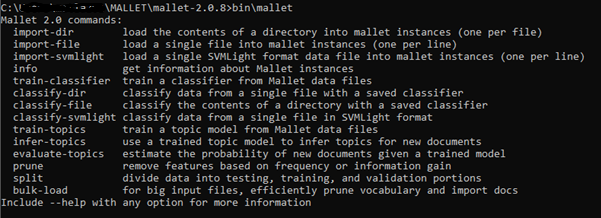

If you don’t have the environment variable set, mallet gives you the error:

“MALLET requires an environment variable MALLET_HOME”


#### 1.3) The commands in the topic modelling process:

*Import your directory of text files which Mallet processes:*

> bin\mallet import-dir --input dhq_corpus\dhq_corpus_complete_2007_2020 --output dhq-mallet --keep-sequence --remove-stopwords 

We are in the root directory of Mallet, thus, c:\..\mallet-2.0.8\

**-bin\mallet**: runs Mallet which is in the directory “bin”

**-import-dir**: “load the contents of a directory into mallet instances (one per file)”

and the parameters related to import-dir (if you run bin\mallet import-dir only, Mallet gives you help about these):

**--input [PATH]** -> [PATH] is the input directory, where our files are found.

**--output [FILE]** -> [FILE] is the output file to which the Mallet output (“instance list”) is written. The default output is “text.vectors” 

**--keep-sequence** -> (required!) documents preserved as sequences of words, needed for topic modelling with Mallet

**--remove-stopwords** -> (optional) Mallet removes stop words; words only in English. For other languages, you can use --stoplist-file parameter and your own stop word list:

**--stoplist-file [FILE]** -> (optional) reads stop words from [FILE], one per line, instead of the default list (same like “--remove-stopwords” but with your own list)

<br>

*To build the topic models:*

> bin\mallet train-topics --input dhq-mallet --num-topics 30 --optimize-interval 20 --output-state dhq_corpus\topic-state.gz --output-topic-keys dhq_corpus\dhq_keys.txt --output-doc-topics dhq_corpus\dhq_composition.txt

-train-topics: “train a topic model from Mallet data files”

parameters of train-topics (for more info, type “bin\mallet train-topics –help”):

**--input [FILE]** -> [FILE] is the Mallet output file (“training instance list”) which you created in the previous step.

**--num-topics [NUM]** -> [NUM] is the amount of topics Mallet will fit in the model. Default is 10.

**--optimize-interval [NUM]** -> Mallet optimizes the weights of the topics based on the material it processes, which in general leads to more accurate topics. Optimization at 20 intervals, as used in programming historian, works well.

**--output-state [FILE]** -> output [FILE] where all the words of the corpus are listed with the topic number they have been assigned to. Very large file (includes all words of the corpus + topic number). Will be a Gzip that can be opened with 7-Zip or Winzip.

**--output-topic-keys [FILE]** -> output [FILE] where the topics with top (most probable words of the topic) k words are stored. k can be defined with –num-top-words, default 20.

**--output-doc-topics [FILE]** -> output [FILE] where the topic composition of the documents is stored.





When running the topic modeling commands, MALLET samples the topic models in 1000 iterations. (this could be changed with parameter --num-iterations). At each 50 iterations we see how the sampling proceeds as a list of topics and the top words of the topics.


..

### 2. Reading Mallet topic model output into Python

We will use topic models on our DHQ corpus in the Lab assignment. Instead, in this learning material, we will use the House of Commons debates from the year 1990 (see Material_3b).

The topic model has been built with the individual speeches that were extracted to text files (the speeches are available in the zip: 1990_speeches.zip)

The topic model was built with the following parameters in Mallet:

> bin\mallet import-dir --input commons\1990_speeches --output commons.mallet --keep-sequence --remove-stopwords

> bin\mallet train-topics --input commons.mallet --num-topics 40 --optimize-interval 20 --output-state commons\topic-state.gz --output-topic-keys commons\commons_keys.txt --output-doc-topics commons\commons_composition.txt


In the learning material, we will look at the "topic keys" output, which contains the topics and their top words, and the "topic composition" output, which shows how the different topics are represented in our source files.

We will leave the "output state" file aside. You can have a look at its content by yourself. It is a very large file, which contains all the words of the corpus with their topic number they have been assigned to. This is a gzip-file, which can be opened eg. with 7-Zip (or Winzip).

We read both the topic keys file and the topic composition file to a Pandas dataframe (see Material 3b). This helps us to explore the file. The files are in tabular format, thus it is possible to open these files also with Excel or other spreadsheet program.


In [ ]:
# We use read_csv() in pandas to read the tabular text files into a pandas dataframe. There is no 
# header in the files, so we have to give "header = None" as a parameter.
# We use the separator "\t" as the values in the file are separated (delimiter) with a tab.

import pandas as pd

# We read the keys output to df_keys dataframe:

df_keys = pd.read_csv("./texts_week4/commons_keys.txt", sep="\t", header = None)

# We read the document composition output to df_composition dataframe:

df_composition = pd.read_csv("./texts_week4/commons_composition.txt", sep="\t", header = None)

In [ ]:
# Let's print 10 first rows of our keys

df_keys.head(10)



In [ ]:
# Looks ok, but let's make it a bit more readable.

# The column width is too narrow to read everything. We can set this option in pandas:

pd.set_option("max_colwidth", 200)

# Also, we can give names to the headings of our columns, which are now 0, 1, and 2. We do this with .columns = [list].
# we have to name all the columns at the same time (see below, how to rename a column):

df_keys.columns = ["topic_nr", "dirichlet_hyp", "top_words"]


In [ ]:
# Let's see how our topics and their most common words look like:

df_keys

Let's think about what the topics could be about! We can get an idea based on the top words in the topics in the documents (in our case: speeches).

Eg. **Topic 12** seems to point at what we discussed in Material_3d thus the conflict in the Gulf Area.

**Topics 5, 1, and 2** seems to contain parliament or legislation related vocabulary

**Topic 23** appears to relate to education and schools

**Topic 34** to seems to relate to labour market policies

Have a look at the other topics too!

---

In [ ]:
# Let's then move to our topic composition dataframe. This helps to find documents that are relevant to our topics. Let's print the top 10 rows:

df_composition.head(5)  # with .head(n) we print n first rows of the dataframe

# In the columns, we have first the number of the document, the filename, and then all the topics. The value in the topic cells
# is the share of the topic in the document thus how represented the topic is according to our model.

# Should we want to display all the columns, we could set this with the option display.max_columns, ie.

# pd.set_option("display.max_columns", 50)
# df_composition.head(5)


In [ ]:
# Let's give our composition dataframe columns right heading names. We enter these as a list which we create in the list variable composition_columns.

composition_columns = []

# The first two columns are the document number and then the file name:

composition_columns.append("doc_no")
composition_columns.append("file")

# We run a for loop which gives the number of the topic as the column heading. We have 40 topics, so we loop from 0 to 39.

topics = 40

for i in range(0, topics):
    composition_columns.append(str(i))

print(composition_columns)

# These are the headings for our columns

In [ ]:
# here we append the list to our column names:

df_composition.columns = composition_columns

In [ ]:
# Ok, let's have another look at the document-topic composition table:

df_composition.head(3)

In [ ]:
# Finally, the cells where the filename is printed is a bit long. We can process that and leave only the filename there.

# We do this by splitting the filename string at "speeches/", and then selecting the latter part of this split [1], thus the filename only.
# With dataframes, we can perform the same operation to each cell by just referring to the column heading, in this case, "file":

# In some other research cases it might be good to save more information, eg. the directory can contain valuable metadata.

df_composition["file"] = df_composition["file"].str.split("speeches/").str[1]



In [ ]:
# Let's print the composition now; much easier to explore

df_composition  # without .head(), pandas prints everything based on the options. The default looks like this.


# In our example, we would not even need the filename as the number of our doc is the same as the filename id.

In [ ]:
# In the example above, we found out that topic 34 could described as "Labour market policies". We can change the column names in pandas to make
# the exploration even easier.

# Let's change thus column heading "34" into "Labour market" 

df_composition= df_composition.rename(columns={"34": "Labour market"})

df_composition

In [ ]:
# One final step to help us with our exploration is to sort our dataframe by some of the topics

# If we want to look at which documents (top 20 -> head(20)) have the largest share of topic "Labour market", we type:

df_composition.sort_values(["Labour market"], ascending=False).head(20)


# For some other topic, just use the column name, e.g. 

# df_composition.sort_values(["10"], ascending=False).head(20)



In [ ]:
# If we want to print certain columns & rows only, we can use iloc[rows-index, columns-index]


# To print the first ten columns, 
#df_composition.iloc[:, 1:12]


# To print the last ten topics in a sorted order:
# df_composition.sort_values(["Labour market"], ascending=False).iloc[:10, 32:42]


# We can also select columns by their name:
#df_composition[["file", "1", "2", "Labour market"]].head(10)


# Or sorted by the column Labour market:
# df_composition[["file", "1", "2", "Labour market"]].sort_values(["Labour market"], ascending=False).head(10)



# Again, should we want to display all the rows, we could set this with the option display.max_columns, ie.
pd.set_option("display.max_columns", 50)
df_composition.head(5)